In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

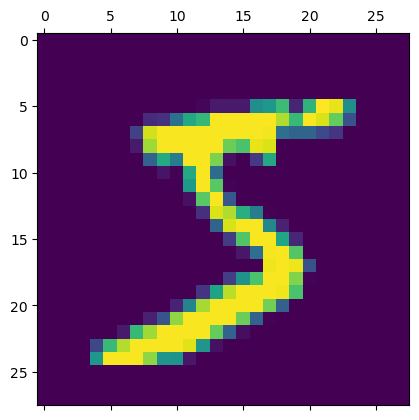

In [4]:
plt.matshow(x_train[0])

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train_flattened  = x_train.reshape(len(x_train),28*28)
x_test_flattened  = x_test.reshape(len(x_test),28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
model.compile(optimizer = 'adam' , 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3031 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9257


In [8]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2643 - accuracy: 0.9277


[0.26434826850891113, 0.9276999831199646]

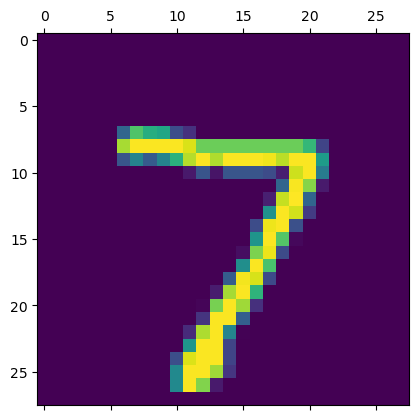

In [9]:
plt.matshow(x_test[0])

In [10]:
predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [11]:
np.argmax(predicted[0])

7

In [12]:
y_predicted_labels = [np.argmax(i) for i in predicted]

In [13]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

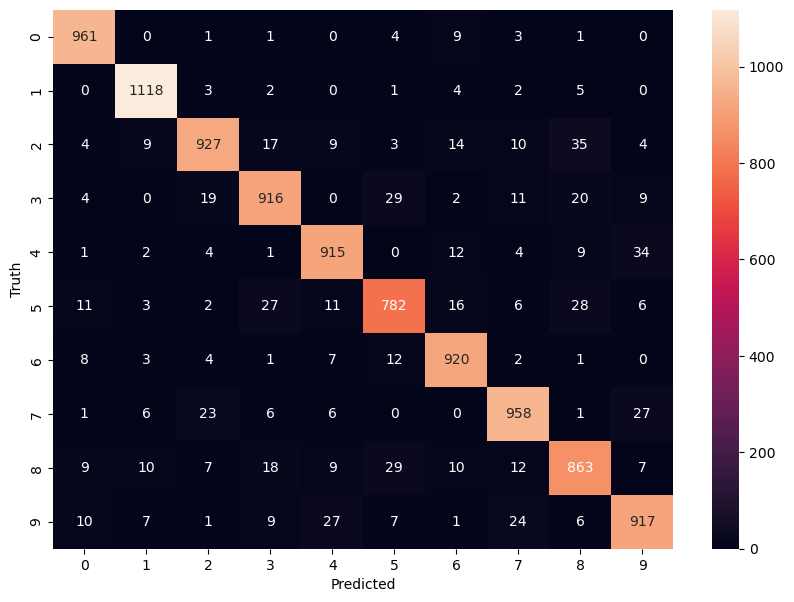

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
tb_callback = keras.callbacks.TensorBoard(log_dir = 'logs/' , histogram_freq = 1)
model.compile(optimizer = 'adam' , 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 5 , callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2715 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1245 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9835


In [18]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.